# Project for Machine Learning and Statistics - December 2021

## Submitted by Sinéad Duffy, ID 10016151

***

## Notebook 2 - Scipy-stats.ipynb

### Brief - write an overview of the SciPy.stats library, outline (using examples) the package and complete an example hypothesis using ANOVA

***

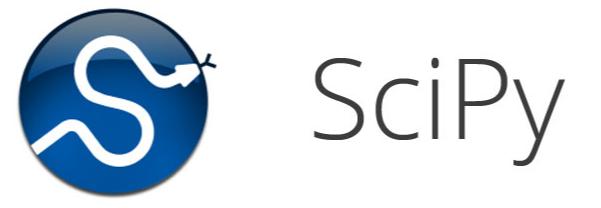

# SciPy.Stats Library
SciPy is a an extension of the NumPy language in Python, and gives users the opportunity to work with data in an environment similar to that of MatLab/ SciLab etc.$^3$  The package is organised into 15 subpackages dealing with specific mathmatical domains such as clustering, optimize, sparse and statistics.  For the purpose of this notebook, the author will focus on the SciPy.Stats package.
<br><br>
SciPy.Stats contains algorithms outlining probability distributions, summary / frequency, correlation and statistical tests.  Users will need to still include packages such as Pandas  to format the data before applying an algorithm to it.
<br><br>
SciPy.Stats allows the user to complete t-tests (__ttest_1samp()__) as well as One-Way Anova (__f_oneway()__).  T-tests allow the user to compare the statistical difference between two groups, whilst a one-way ANOVA between three or more groups.  Completing a one-way ANOVA is outlined in the following paragraphs. 

***
### What is a One-Way ANOVA
<br>
Laerd Statistics defines ANOVA as being short for one-way analysis of variance, and outlines that it is used to see if there are any statistically significant differences between 3 or more independent (unrelated) groups.$^9$
<br><br>
An ANOVA will allow a person to understand the statistical differences (variances) through use of hypotheses.  In this instance, an null hypothesis and an alternative hypothesis is formed, along with a research question to be answered.
<br><br>
The research question in this instance is; What is the best video to show when informing a group of the public about a medical condition.
<br><br>
The hypotheses relating to this question are;
<br><br>
<b>1 - Null Hypothesis</b> is that there is no difference between the subjects knowledge of the medical condition after watching the videos
<br><br>
<b>2 - Alternative Hypothesis</b> is that there is a difference between the groups based on their knowledge of the medical condition

***

Laerd Statistics$^2$ outline that for a sucessful ANOVA to be run, the data will need to pass 6 assumptions.  The assumptions are;

1 - <b>Dependent variable</b> is an interval or ratio along a continious scale<br>
2 - <b>Independent Variable</b> should be made up of categorical groups<br>
3 - The data has <b>independence of observations</b><br>
4 - The data has <b>no significant outliers</b><br>
5 - The dependent variable has <b>a normal distribution</b> for each category of the independent variable<br>
6 - There is <b>homogeneity of variances</b> in the data<br>

The author has determined that the independent variable in this example is the categorical data which outlines the groups who have heard / not heard / or it is not relevant of the medical condition (i.e the column of Heardofcondition).  The dependent variable is the first preference video of the shown to the public.  The data has been gathered using a Likert Scale.

In [1]:
# import the standard pyton libraries
import pandas as pd
import numpy as np

# import graphs library
import seaborn as sns
import matplotlib as plt

# set style for graphs
sns.set_style("white")

# Statsistical Libraries
import scipy.stats as ss

# create tables
from tabulate import tabulate


### Import and explore the dataset

The chosen dataset relates to informational videos relating to a prescribed medical condition.  The dataset was sourced from the University of Sheffield. $^1$
<br>

The attributes of the dataframe are;

- Person, index value to the person who answered the survey
- Gender, with binary values of 1= Male, 2 = Female
- Heardofcondition questions if the respondent heard of the condition being discussed, the answers are 0 = N/A, 1 = Yes, 2 = No
- Set gives the order of the groups the preference of the respondents in terms of videos watched, the replies are maked as
        - 1 = General Video A, 
        - 2 = Medical video B, 
        - 3 = Old video C, 
        - 4 = Demo D
    - @1st-Favourite video
    - @2nd-2nd favourite
    - @3rd-3rd favourite
    - @4th-Least favourite
- Combination displays the order that videos were seen in; the combination is shown as a series of numbers
- General understandings of the videos.  The ordinal Likert scale used was from 1, where the respondents strongly disagree to 5 where the respondents strongly agree
    - VideoAGenUnderstandingCONDITION wehere the video A is a general understanding
    - VideoBdoctorUnderstandingCONDITION where video B Doctors video B understanding
    - VideoCOldUnderstandingCONDITION where video C is the old understanding
    - DEMOUnderstandingCONDITION where video D demonstrates an understanding
- TotalAGen-Overall score (video A)
- TotalBdoc-Overall score (video B) 
- TotalCOld-Overall score (video C)
- TotalDDEMO-Overall score (demo D)

The following sections outline explore the dataframe before completing the ANOVA analysis.

In [2]:
# import the dataframe to the notebook
df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.937213!/file/Video_R.csv')

#display first 5 rows of the dataframe
df.head(5)

,Person,Gender,Heardofcondition,Set,@1st,@2nd,@3rd,@4th,Combination,VideoAGenUnderstandingCONDITION,VideoBdoctorUnderstandingCONDITION,VideoCOldUnderstandingCONDITION,DEMOUnderstandingCONDITION,TotalAGen,TotalBdoc,TotalCOld,TotalDDEMO
0,1,1,1,1,4,1,3,2,4132,5,5,3,5,25,23,13,22
1,2,2,1,1,4,1,3,2,4132,5,5,5,5,23,23,20,22
2,3,2,2,1,4,1,3,2,4132,4,4,2,5,20,17,14,23
3,4,2,0,1,4,1,3,2,4132,5,5,5,5,24,24,23,25
4,5,2,2,1,4,1,3,2,4132,5,5,4,5,25,22,18,23


In [3]:
#show the main statistics associated with df
df.describe()

,Person,Gender,Heardofcondition,Set,@1st,@2nd,@3rd,@4th,Combination,VideoAGenUnderstandingCONDITION,VideoBdoctorUnderstandingCONDITION,VideoCOldUnderstandingCONDITION,DEMOUnderstandingCONDITION,TotalAGen,TotalBdoc,TotalCOld,TotalDDEMO
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,1.65000,0.800000,11.500000,2.500000,2.250000,3.000000,2.250000,2757.250000,4.750000,4.550000,3.300000,4.900000,24.100000,22.450000,14.650000,21.850000
std,5.91608,0.48936,0.767772,8.413648,1.147079,1.332785,0.725476,1.118034,1042.998556,0.444262,0.604805,1.218282,0.307794,1.252366,1.605091,4.869616,2.455391
min,1.00000,1.00000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1342.000000,4.000000,3.000000,1.000000,4.000000,20.000000,17.000000,5.000000,17.000000
25%,5.75000,1.00000,0.000000,7.750000,1.750000,1.000000,2.750000,1.750000,2158.750000,4.750000,4.000000,2.000000,5.000000,24.000000,22.000000,12.500000,20.750000
50%,10.50000,2.00000,1.000000,10.500000,2.500000,2.000000,3.000000,2.000000,2777.500000,5.000000,5.000000,3.000000,5.000000,24.000000,23.000000,14.000000,22.000000
75%,15.25000,2.00000,1.000000,14.250000,3.250000,3.250000,3.250000,2.500000,3376.000000,5.000000,5.000000,4.000000,5.000000,25.000000,23.000000,18.000000,23.500000
max,20.00000,2.00000,2.000000,24.000000,4.000000,4.000000,4.000000,4.000000,4132.000000,5.000000,5.000000,5.000000,5.000000,25.000000,25.000000,23.000000,25.000000


***
### Preparing for the ANOVA

This section will look at the 6 assumptions that must be taken into account to run a true ANOVA.
<br> <br> 
As outlined above, 6 assumptions must be passed in order for the results of the ANOVA to be true. 

***

#### Assumption 1 - Dependent Variable

The dependent variable 'should be measured at the interval or ratio level (i.e., they are continuous).'$^2$
<br> <br> 
In this instance, the chosen dependent variable is the 1st preference video of each of the group.  

In [4]:
# Set a value for the dependent variable

dependent = df['@1st']


***
#### Assumption 2 - Independent Variable

The indepedent variable should consist of at least two independent categorical groups$^2$.
<br> <br> 
For this analysis, the chosen categorical variable with no overlap e.g.you have heard of the condition, you haven't heard of the condition, or the question is not appliciable to you.

In [5]:
#The independent variable 

independent = df['Heardofcondition']


***
#### Assumption 3 - Independence of Observation

This refers to the fact that there should be no relationship between the groups themselves $^2$.
<br><br>
This dataset was collected to evaulate the best way of educating the public about a medical condition$^1$. 
<br><br>
The source does not call out any relationships between the groups of data.  Data was collected using Likert style questions were answers were given along a scale.$^2$
<br>

***
#### Assumption 4 - No Significant Outliers

Laerd Statistics outlines that the chosen variables should have no significant outliers in the data$^2$. 
<br><br>
The author will demonstrate this using boxplots.  The dependent and independent variables are plotted together and seperately to identify any outliers.
<br><br>
As can be clearly seen, there is no significant outliers identifed in the dataset.
<br>

<AxesSubplot:xlabel='@1st', ylabel='Heardofcondition'>

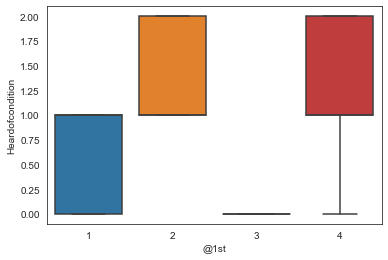

In [6]:
#plotting the dependent and independent variables

sns.boxplot(x=dependent, y=independent)

<AxesSubplot:xlabel='@1st'>

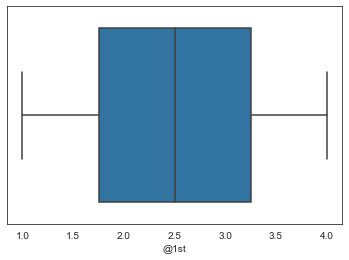

In [7]:
#plotting the dependent variable

sns.boxplot(x=dependent)

<AxesSubplot:ylabel='Heardofcondition'>

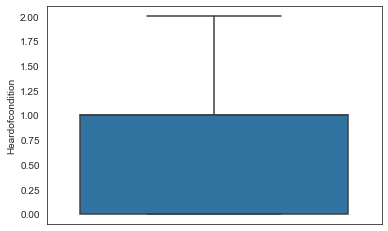

In [8]:
#plotting the independent variable

sns.boxplot(y=independent)

***
#### Assumption 5 - Normal distribution for each of the independent variable categories

One of the key assumptions is that the dependent variable should approximately follow a normal distribution for the different categories of the individual variable$^2$.
<br><br>
To confirm if a normal distribution is true, a displot of the independent variables is plotted against the dependent varaible.  The results show that the curves appear to largely follow a normal distribution.
<br><br>
Further analysis can be completed using the Shapiro Wilks test as the sample in this instance is less than 50$^4$. 
<br><br>
Results of the Shapiro Wilks test with a pvalue of greater that 0.05$^6$, indicate that the data is normally distributed.  Where the value of p is less than 0.05, then the data is not normal, i.e. the data will deviate from a normal distribution.$^4$
<br>

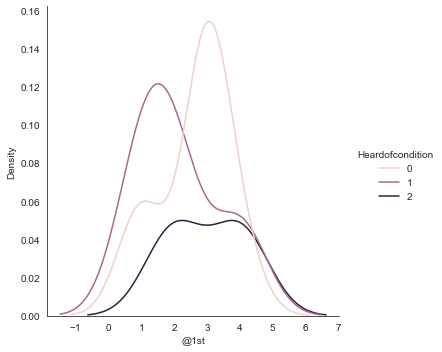

In [9]:
sns.displot(x=dependent, hue=independent, kind="kde")

In [10]:
# Shapiro Wilk test for Normalacy - 1
# previous knowledge N/a

shapiro_test1 = ss.shapiro(dependent[independent == 0])
#shapiro_test1

print("The p-value of the Shapiro_Test1 is = {:.2}".format(shapiro_test1.pvalue))

The p-value of the Shapiro_Test1 is = 0.011


In [11]:
# Shapiro Wilk test for Normalacy - 2
# previous knowledge is yes

shapiro_test2 = ss.shapiro(dependent[independent == 1])
#shapiro_test2

print("The p-value of the Shapiro_Test2 is = {:.2}".format(shapiro_test2.pvalue))

The p-value of the Shapiro_Test2 is = 0.025


In [12]:
# Shapiro Wilk test for Normalacy - 3
# previous knowledge is no

shapiro_test3 = ss.shapiro(dependent[independent == 2])
#shapiro_test3

print("The p-value of the Shapiro_Test3 is = {:.2}".format(shapiro_test3.pvalue))

The p-value of the Shapiro_Test3 is = 0.024


***
#### Assumption 6 - Homogeneity of variances

Laerd Statistics outlines that the 6th and final assumption to complete an Anova analysis is that there must be 'homogeneity of variances'.$^2$  This relates to the <i>t</i> and <i>F</i> statistics respectivly $^2$,$^4$ , and basically means that the variance of the different groups should be the same$^6$.

Laerd Statistics$^2$ outline that the Levene’s test for homogeneity of variances will help determine if this is the case for the chosen dataset.

The pvalue result (the significant value) should be greater than 0.05 for the variances to be treated as equal$^7$.

Using the levene test, it is possible to say that the current dataset has equal values.

In [13]:
#test for variances - Levene

ss.levene(
    dependent[independent == 0], 
    dependent[independent == 1], 
    dependent[independent == 2])

LeveneResult(statistic=0.35581395348837214, pvalue=0.7056977836063021)

***
#### Review of the Assumptions

In order for the data to comply with the ANOVA standards, it must pass all of the 6 assumptions outlined above.
<br>
The results of the analysis clearly show that Assumption 5 outlining the need for the data to follow a normal distribution curve initially is true.  However further analysis using the Shapiro-Wilks tests shows that the data fails this test.
<br><br>
The table below shows the results of the 3 tests runs for each of the categories of data.  All the values are less than 0.05, therefore the data does not follow a normal distribution.
<br><br>
Assumption 5 is the only assumption to fail the ANOVA test.  Laerd Statistics outline that the one-way ANOVA is a robust test and can accept data that does not fully follow the normal distribution$^10$. 
<br><br>
On that basis, the author has decided to proceed with the ANOVA test, and will complete post hoc analysis using Tukey's honestly significant difference (HSD) as outined by Laerd Statistics.
<br>

In [14]:
# display the results of the Shapiro results

shapiro_results = {'Test1': [shapiro_test1.pvalue], 
        'Test2': [shapiro_test2.pvalue], 
        'Test3':[shapiro_test3.pvalue]}

print(tabulate(shapiro_results, headers='keys', tablefmt='fancy_grid'))

╒═══════════╤═══════════╤═══════════╕
│     Test1 │     Test2 │     Test3 │
╞═══════════╪═══════════╪═══════════╡
│ 0.0107576 │ 0.0249161 │ 0.0238568 │
╘═══════════╧═══════════╧═══════════╛


***
### Running the ANOVA

A pvalue result of greater than 0.05 mens that there was no statistially difference between the groups, and therefore the null hypothesis can be rejected $^8$ 

A pvalue result of less than 0.05 determines that a statistical difference was found. This requires a posthoc test should be run. $^8$ 

A posthoc will allow the author to deterimine where the difference between the groups occurred
<br> 


In [15]:
ss.f_oneway(
    dependent[independent == 0], 
    dependent[independent == 1], 
    dependent[independent == 2])

F_onewayResult(statistic=0.8406593406593407, pvalue=0.44859232065749804)

---

### Reporting the results of the ANOVA

https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php



The pvalue of the one-way ANOVA is 0.45 (see above).  This means that no statistical difference was identifed between the groups, so the null hypothesis can be rejected i.e. there is no difference between the subjects knowledge of the medical condition after watching the videos.

The author does acknowledge that the test group of 20 individuals was quiet small.

***
### Post hoc test

As outlined previously, the dataset failed the normality test in Assumption 5.  One of the reasons for this could be the small size of the sample.  As such, the Author has decided to undertake post hoc analsys. 
<br><br>
Laerd Satistic's suggest using Tukey's honestly significant difference (HSD) in cases where assumption 6 was not violated.  In the case of this notebook, Assumption 5 was not met, i.e. normal distribtuion was not found to be in place.  Tukey's test (also known as the honestly significant difference (HSD) test) will help explain where the signifcant differences lie between the groups that form part of the analysis.$^11$


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df['@1st'], groups=df['Heardofcondition'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1     -0.5 0.6594 -1.9834 0.9834  False
     0      2    0.375 0.8476 -1.4418 2.1918  False
     1      2    0.875 0.4511 -0.9418 2.6918  False
---------------------------------------------------


Referencing back to the ANOVA, the pvalue was 0.45, which is in excess of 0.05 which finds that the groups are significantly different.  The results of Tukey's Post Hoc analsyis show that;
<br>
1. the pvalue of differences between group 0 and group 1 was 0.6594
2. the pvalue of differences between group 0 and group 2 was 0.8476
3. the pvalue of differences between group 0 and group 1 was 0.4511


As all the values are in excess of the pvalue of the ANOVA, and also in excess of the 0.05, it is possible to say that there is a statistically significant difference between all the goups. 

***

### Conclusion



In conclusion, it is possoble to say that there is no statistical difference between the groups who watched the video, and their previous knowledge of the subject.

***
### References:

1. University of Sheffield.ac.uk, Datasets for Teaching, https://www.sheffield.ac.uk/mash/statistics/datasets, accessed 01 December 2021
2. Laerd Statistics, One-way ANOVA in SPSS Statistics, https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php , accessed 01 December 2021
3. Scipy.org, Statistical functions (scipy.stats), https://docs.scipy.org/doc/scipy/reference/stats.html, accessed 01 December 2021
4. , LaerdStatistics.com, Testing for Normality using SPSS Statistics, https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php, accessed 29 December 2021
5. Statistic Solutions.com, The Assumption of Homogeneity of Variance, https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/, accessed 29 December 2021
6. TechnologyNetworks.com, One-Way vs Two-Way ANOVA: Differences, Assumptions and Hypotheses, https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553, accessed 29 December 2021
7. LaerdStatistics.com, Independent t-test for two samples, https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php, accessed 29 December 2021
8. LaerdStatistics.com, One-way ANOVA (cont...), https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php, accessed 29 December 2021
9. LaerdStatistic.com, One-way ANOVA, https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php, accessed 29 December 2021
10. LaerdStatistic.com, One-way ANOVA (Contd.), https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php , accessed 29 December 2021
11. Statisticshowto.com, What is the Tukey Test / Honest Significant Difference? , https://www.statisticshowto.com/tukey-test-honest-significant-difference/, accessed 30 December 2021



## End
